In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [34]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [35]:
len(X_train)

60000

In [36]:
len(X_test)

10000

<Figure size 640x480 with 0 Axes>

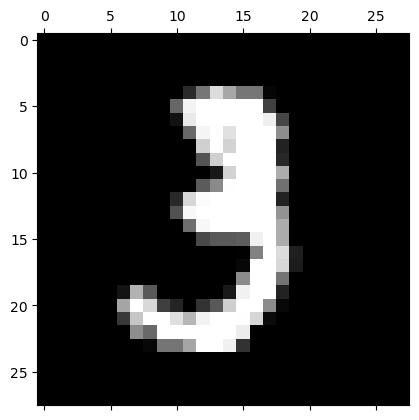

In [37]:
plt.gray()
plt.matshow(X_train[10])

In [63]:
X_train=X_train/255
X_test=X_test/255

In [64]:
import tensorflow as tf
from tensorflow.keras import layers

cnn = tf.keras.Sequential([
    ## Convolutional Layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    ## Flatten the output from the convolutional layers
    layers.Flatten(),
    
    ## Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5832 - loss: 1.3707
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8967 - loss: 0.3536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9103 - loss: 0.3127
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9164 - loss: 0.2813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9246 - loss: 0.2576
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9327 - loss: 0.2320
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9373 - loss: 0.2157
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9425 - loss: 0.1974
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9454 - loss: 0.1844
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9476 - loss: 0.1743


In [65]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9451 - loss: 0.1899


[0.17322787642478943, 0.9502000212669373]

In [66]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [67]:
y_pred[:5]

array([[3.2169004e-07, 6.5433808e-10, 2.7640890e-06, 4.9339450e-04,
        6.0956595e-10, 5.9829348e-05, 4.4364625e-12, 9.9871433e-01,
        2.2304341e-06, 7.2709896e-04],
       [1.1807863e-07, 2.2857034e-06, 9.9992621e-01, 1.6251925e-05,
        2.1002653e-16, 5.2312666e-05, 7.9788742e-07, 1.9808702e-13,
        2.0358336e-06, 9.2393880e-14],
       [9.7265947e-06, 9.8775291e-01, 8.8503386e-04, 5.0076807e-04,
        2.6033202e-04, 7.5510034e-04, 6.6368803e-03, 5.1113061e-04,
        2.6666760e-03, 2.1384521e-05],
       [9.9941730e-01, 2.1601800e-12, 3.9368377e-05, 6.6061031e-05,
        9.1261867e-08, 3.5736972e-05, 4.0515285e-04, 1.5067877e-05,
        1.7367596e-05, 3.8378898e-06],
       [2.2989053e-07, 2.5211227e-08, 1.7470129e-05, 3.3806723e-06,
        9.9146408e-01, 1.0524909e-04, 1.1678970e-04, 8.9863504e-05,
        5.7071459e-04, 7.6321131e-03]], dtype=float32)

In [69]:
y_pred_class=[np.argmax(i) for i in y_pred]

In [74]:
y_pred_class[10:15]

[0, 6, 9, 0, 1]

In [75]:
y_test[10:15]

array([0, 6, 9, 0, 1], dtype=uint8)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
cn=tf.math.confusion_matrix(y_pred_class,y_test)

Text(50.722222222222214, 0.5, 'Truth')

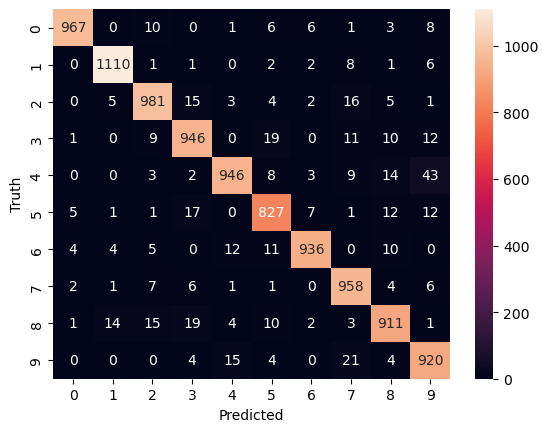

In [83]:
import seaborn as sn
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
print(classification_report(y_pred_class,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1002
           1       0.98      0.98      0.98      1131
           2       0.95      0.95      0.95      1032
           3       0.94      0.94      0.94      1008
           4       0.96      0.92      0.94      1028
           5       0.93      0.94      0.93       883
           6       0.98      0.95      0.96       982
           7       0.93      0.97      0.95       986
           8       0.94      0.93      0.93       980
           9       0.91      0.95      0.93       968

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

